In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt

In [2]:
list_features = []
list_targets = []
for i in range(1, 11):
    X, y = load_svmlight_file(f='Dataset/batch' + str(i) + '.dat', dtype=np.float64)
    X = pd.DataFrame(X.toarray())
    y = pd.Series(y)
    
    list_features.append(X)
    list_targets.append(y)
    
X = pd.concat(list_features, ignore_index=True)
y = pd.concat(list_targets, ignore_index=True)

In [3]:
print(X.shape)
X.head()

(13910, 128)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,15596.1621,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.6914,1.768526,...,-1.071137,-3.037772,3037.0390,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529
1,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.7812,2.164706,...,-1.530519,-1.994993,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225
2,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,2.840403,...,-2.384784,-2.867291,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370
3,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.0664,2.851173,...,-2.607199,-3.058086,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957
4,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.5899,3.480866,...,-3.594763,-4.181920,8158.6449,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756


In [4]:
scaler = MinMaxScaler(feature_range=(-1, 1))
cols = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)

C:\Users\Francisco\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Francisco\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


PCA
Análise de componentes principais com os principais atributos a serem analisados

C:\Users\Francisco\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


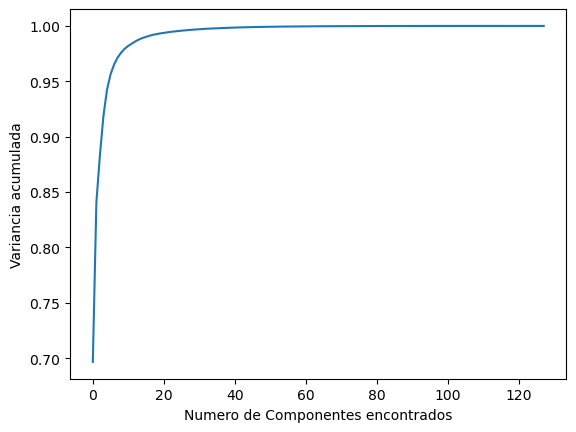

In [5]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de Componentes encontrados')
plt.ylabel('Variancia acumulada')
plt.show()

In [6]:
X_pca = PCA(0.995).fit_transform(X) # PCA(30) com 1/4 das features
X_pca = pd.DataFrame(X_pca)

C:\Users\Francisco\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [7]:
y.name = 'target'
dataset = pd.concat([X, y], axis=1)
dataset.to_csv('Dataset/dataset.csv', index=False)

In [8]:
# Dataset de treinamento do modelo
y.name = 'target'
dataset_pca = pd.concat([X_pca, y], axis=1)
dataset_pca.to_csv('Dataset/dataset_pca.csv', index=False)

In [9]:
# Datasets de testes do sistema
# Criar quatro amostras do dataset
sample1 = X_pca.sample(frac=0.50, random_state=1)
sample2 = X_pca.sample(frac=0.50, random_state=2)
sample3 = X_pca.sample(frac=0.50, random_state=3)
sample4 = X_pca.sample(frac=0.50, random_state=4)

# Salvar as amostras em disco
sample1.to_csv('sample1.csv', index=False)
sample2.to_csv('sample2.csv', index=False)
sample3.to_csv('sample3.csv', index=False)
sample4.to_csv('sample4.csv', index=False)